In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [96]:
balance_cols = ['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance']

In [97]:
my_frame = pd.read_csv('balance-scale.csv', names = balance_cols)
my_frame.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [98]:
my_frame.shape

(625, 5)

In [99]:
my_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left-Weight     625 non-null    int64 
 2   Left-Distance   625 non-null    int64 
 3   Right-Weight    625 non-null    int64 
 4   Right-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [100]:
my_frame.describe()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [101]:
my_frame.isnull().sum()

Class Name        0
Left-Weight       0
Left-Distance     0
Right-Weight      0
Right-Distance    0
dtype: int64

<AxesSubplot:>

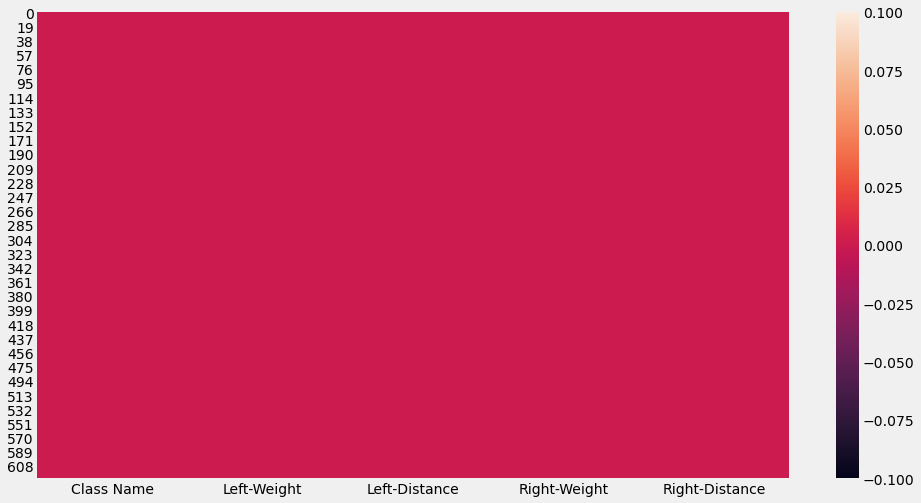

In [102]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize = (15, 8))
sns.heatmap(my_frame.isnull())

In [103]:
my_frame.corr()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
Left-Weight,1.000000e+00,7.034373e-16,-5.798029e-16,-1.017497e-15
Left-Distance,7.034373e-16,1.000000e+00,-1.278977e-16,-3.311129e-16
Right-Weight,-5.798029e-16,-1.278977e-16,1.000000e+00,-5.613288e-17
Right-Distance,-1.017497e-15,-3.311129e-16,-5.613288e-17,1.000000e+00


In [104]:
my_frame = my_frame.drop('Class Name', axis = 1)

In [105]:
my_frame.head()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


## train test split

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [107]:
x = my_frame.drop('Right-Distance', axis = 1).values
y = my_frame['Right-Distance'].values

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

## Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
lR_model = LogisticRegression()

In [111]:
lR_model.fit(x_train, y_train)

LogisticRegression()

In [112]:
lR_y_pred = lR_model.predict(x_test)

In [113]:
print(classification_report(y_test, lR_y_pred))
print(confusion_matrix(y_test, lR_y_pred))
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, lR_y_pred) * 100)

              precision    recall  f1-score   support

           1       0.17      0.17      0.17        24
           2       0.12      0.45      0.19        20
           3       0.00      0.00      0.00        24
           4       0.33      0.06      0.11        32
           5       0.42      0.20      0.27        25

    accuracy                           0.16       125
   macro avg       0.21      0.18      0.15       125
weighted avg       0.22      0.16      0.14       125

[[ 4 16  1  2  1]
 [ 5  9  2  1  3]
 [ 5 17  0  1  1]
 [ 7 18  3  2  2]
 [ 3 17  0  0  5]]

Logistic Regression Accuracy: 16.0


## SVM

In [114]:
from sklearn.svm import SVC

In [115]:
svc_model = SVC(kernel = 'linear')

In [116]:
svc_model.fit(x_train, y_train)

SVC(kernel='linear')

In [117]:
svc_y_pred = svc_model.predict(x_test)

In [118]:
print(classification_report(y_test, svc_y_pred))
print(confusion_matrix(y_test, svc_y_pred))
print("\nSVM Accuracy:", accuracy_score(y_test, svc_y_pred) * 100)

              precision    recall  f1-score   support

           1       0.16      0.25      0.20        24
           2       0.14      0.50      0.22        20
           3       0.11      0.08      0.09        24
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00        25

    accuracy                           0.14       125
   macro avg       0.08      0.17      0.10       125
weighted avg       0.07      0.14      0.09       125

[[ 6 15  3  0  0]
 [ 7 10  3  0  0]
 [ 7 15  2  0  0]
 [10 18  4  0  0]
 [ 7 11  7  0  0]]

SVM Accuracy: 14.399999999999999


G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
nb_model = GaussianNB()

In [121]:
nb_model.fit(x_train, y_train)

GaussianNB()

In [122]:
nb_y_pred = nb_model.predict(x_test)

In [123]:
print(classification_report(y_test, nb_y_pred))
print(confusion_matrix(y_test, nb_y_pred))
print("\nNaive Bayes Accuracy:", accuracy_score(y_test, nb_y_pred) * 100)

              precision    recall  f1-score   support

           1       0.12      0.12      0.12        24
           2       0.12      0.50      0.20        20
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        32
           5       0.13      0.08      0.10        25

    accuracy                           0.12       125
   macro avg       0.07      0.14      0.08       125
weighted avg       0.07      0.12      0.08       125

[[ 3 17  1  0  3]
 [ 6 10  1  0  3]
 [ 6 14  0  0  4]
 [ 6 21  2  0  3]
 [ 5 18  0  0  2]]

Naive Bayes Accuracy: 12.0


G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNearest Neighbor

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn_model = KNeighborsClassifier(n_neighbors = 2)

In [126]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [127]:
knn_y_pred = knn_model.predict(x_test)

In [128]:
print(classification_report(y_test, knn_y_pred))
print(confusion_matrix(y_test, knn_y_pred))
print("\nKNN Accuracy:", accuracy_score(y_test, knn_y_pred) * 100)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        24
           2       0.02      0.05      0.03        20
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00        25

    accuracy                           0.01       125
   macro avg       0.00      0.01      0.01       125
weighted avg       0.00      0.01      0.00       125

[[ 0 13  9  2  0]
 [11  1  8  0  0]
 [10 12  0  2  0]
 [17 10  5  0  0]
 [14  9  2  0  0]]

KNN Accuracy: 0.8


G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
dt_model = DecisionTreeClassifier()

In [131]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [132]:
dt_y_pred = dt_model.predict(x_test)

In [133]:
print(classification_report(y_test, dt_y_pred))
print(confusion_matrix(y_test, dt_y_pred))
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_y_pred) * 100)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      24.0
           2       0.00      0.00      0.00      20.0
           3       0.00      0.00      0.00      24.0
           4       0.00      0.00      0.00      32.0
           5       0.00      0.00      0.00      25.0

    accuracy                           0.00     125.0
   macro avg       0.00      0.00      0.00     125.0
weighted avg       0.00      0.00      0.00     125.0

[[ 0 19  4  0  1]
 [15  0  4  0  1]
 [18  5  0  0  1]
 [25  4  2  0  1]
 [23  1  1  0  0]]

Decision Tree Accuracy: 0.0


G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Average Accuracy

In [134]:
avg_predict = (lR_y_pred + svc_y_pred + nb_y_pred + knn_y_pred + dt_y_pred) // 5
predict_accuracy = accuracy_score(y_test, avg_predict)
print("Average Prediction of Models:", predict_accuracy * 100)

Average Prediction of Models: 10.4


## Apply bagging & boosting

In [135]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss

In [136]:
voting_classifier = VotingClassifier(estimators = [('LR', lR_model), ('SVC', svc_model), ('NB', nb_model), ('KNN', knn_model), ('DTree', dt_model)], voting = 'hard')

In [137]:
voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('SVC', SVC(kernel='linear')),
                             ('NB', GaussianNB()),
                             ('KNN', KNeighborsClassifier(n_neighbors=2)),
                             ('DTree', DecisionTreeClassifier())])

In [138]:
voting_y_pred = voting_classifier.predict(x_test)

## Apply KFold

In [139]:
from sklearn.model_selection import KFold, cross_val_score

In [140]:
svm_bagging_model = BaggingClassifier(base_estimator = svc_model, n_estimators = 40, random_state = 14)
dtree_bagging_model = BaggingClassifier(base_estimator = dt_model, n_estimators = 40, random_state = 14)
knn_bagging_model = BaggingClassifier(base_estimator = knn_model, n_estimators = 40, random_state = 14)

In [141]:
def bagging_ensemble(my_model):
    k_folds = KFold(n_splits = 20, random_state = 14, shuffle = True)
    results = cross_val_score(my_model, x_train, y_train, cv = k_folds)
    print('Results:', results.mean())

In [142]:
bagging_ensemble(svm_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(knn_bagging_model)

Results: 0.12000000000000002
Results: 0.0
Results: 0.0


## Apply KFold on number estimators

In [143]:
k_folds = KFold(n_splits = 20, random_state = 14, shuffle = True)
n_estimators = [20, 40, 60, 80, 100]

for i in n_estimators:
    ada_boost = AdaBoostClassifier(n_estimators = i, random_state = 14)
    results = cross_val_score(ada_boost, x_train, y_train, cv = k_folds)
    print('Results for {} estimators:'.format(i))
    print(results.mean())

Results for 20 estimators:
0.10400000000000001
Results for 40 estimators:
0.10600000000000002
Results for 60 estimators:
0.10400000000000001
Results for 80 estimators:
0.10400000000000001
Results for 100 estimators:
0.10600000000000001
